In [1]:
%matplotlib inline

import math
import time
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import beta
from scipy.ndimage.interpolation import shift
import seaborn as sns

In [2]:
from pathlib import Path

commondir = './simresults/'
Path(commondir + "images").mkdir(parents=True, exist_ok=True)

In [3]:
def NormalizeUtility(val, numplayers):
    return   (0.5/numplayers - val)/(0.5/numplayers)


# Sim Beta

In [4]:
####################
# Sim Beta
####################
dir = commondir + 'sim-beta/results'

# History length
historyLenArray = [100] 
alpha = 1 


# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.05, 1.1, 1.2, 1.3, 1.4, 1.5]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        # print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000270,0.000135,0.008794,0.055,0.000274,0.000130,0.008818,0.061111
1,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000257,0.000135,0.000317,0.000,0.000262,0.000130,0.000335,0.000000
2,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000324,0.000830,0.011222,0.055,0.000333,0.000906,0.011693,0.061111
3,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000274,0.000906,0.011143,0.000,0.000278,0.000991,0.012363,0.000000
4,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000335,0.000053,0.010333,0.009,0.000326,0.000059,0.010617,0.008889
5,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000265,0.000053,0.001635,0.000,0.000262,0.000059,0.001252,0.000000
6,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000320,0.000604,0.011746,0.009,0.000323,0.000664,0.012169,0.010000
7,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000266,0.000254,0.000000,0.000,0.000266,0.000276,0.000000,0.000000
8,64,8,64,1,1,NaN,1000,1.05,100,0.97,...,NaN,NaN,0.000290,0.000200,0.010540,0.001,0.000298,0.000153,0.011146,0.001111
9,64,8,8,1,2,1.0,1000,1.05,100,0.97,...,400.0,0.981637,0.000264,0.000200,0.000603,0.000,0.000250,0.000153,0.000000,0.000000


In [5]:
writer = pd.ExcelWriter(commondir + 'SimBeta.xlsx', engine='xlsxwriter')
df.to_excel(writer,index=False)
writer.save()

In [6]:
####################
# Sim Beta
####################
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]

                    dfTmp1Mix = dfTmp1[(dfTmp1.numliars == 1)]
                    dfTmp2Mix = dfTmp2[(dfTmp2.numliars == 1)]

                    UtilityMixHonests1 = dfTmp1Mix.UtilityHonest.mean()
                    UtilityMixHonests2 = dfTmp2Mix.UtilityHonest.mean()
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1Mix.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2Mix.UtilityDishonest.mean()
                        
                    
                    print("\nSimulation using numplayers =", numplayers, " numclusters = ", numclusters, 
                          " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                    
                    if dfTmp1.UtilityHonest.empty or dfTmp2.UtilityHonest.empty:
                        print("\tDataFrame is empty!")
                        continue
                    else:
                        print("\tDataFrame has", len( dfTmp1.UtilityHonest), " simulations.")
                        
                    if (numLiars > 0):
                        print("\n\tPlayer Utility QPQ. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1, UtilityMixDishonests1))
                        print("\tPlayer Utility QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests2, UtilityMixDishonests2))
                        print("\tPlayer Utility Ratio QPQ/QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1/UtilityMixHonests2, UtilityMixDishonests1/UtilityMixDishonests2))


Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.05  and historyLen =  100
	DataFrame has 5000  simulations.

	Player Utility QPQ. Honest players: 0.00033, Dishonest player: 0.00030
	Player Utility QPQ2. Honest players: 0.00029, Dishonest player: 0.00028
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.14320, Dishonest player: 1.07214

Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.1  and historyLen =  100
	DataFrame has 5000  simulations.

	Player Utility QPQ. Honest players: 0.00033, Dishonest player: 0.00034
	Player Utility QPQ2. Honest players: 0.00029, Dishonest player: 0.00043
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.14072, Dishonest player: 0.80503

Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.2  and historyLen =  100
	DataFrame has 5000  simulations.

	Player Utility QPQ. Honest players: 0.00033, Dishonest player: 0.00064
	Player Utility QPQ2. Honest players: 0

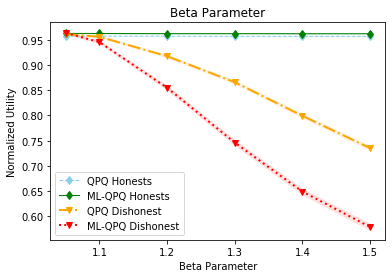

In [7]:
####################
# Sim Beta
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'betaFactor': [] 
             }

confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2 , numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1
                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
                        
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsLow2'].append(float(0))
                        simresults['confidence_intervalDishonestsHigh1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float(0))
                        
                    simresults['betaFactor'].append(betaFactor)
                    
rst = pd.DataFrame(data=simresults) 
# multiple line plot
plt.plot( 'betaFactor', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honests")
plt.plot( 'betaFactor', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honests")
plt.fill_between('betaFactor','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('betaFactor','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'betaFactor', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'betaFactor', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('betaFactor','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('betaFactor','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("Beta Parameter")
plt.xlabel("Beta Parameter")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/betaparameter.eps', format='eps')
plt.savefig(commondir + 'images/betaparameter.pdf', format='pdf')

# Sim Clusters

In [8]:
####################
# Sim Cluster
####################
dir = commondir + 'sim-clusters/results'

# History length
historyLenArray = [100] 
alpha = 1 


# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [2, 4, 8, 16, 32]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        # print("Reading file ", fname," using numplayers =", numplayers, 
                        #     " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000307,0.000760,0.012349,0.104,0.000312,0.000833,0.013069,0.115556
1,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000296,0.000801,0.000000,0.000,0.000299,0.000878,0.000000,0.000000
2,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000351,0.000090,0.012444,0.056,0.000345,0.000082,0.013122,0.062222
3,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000314,0.000794,0.000048,0.000,0.000320,0.000864,0.000000,0.000000
4,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000352,0.000088,0.016444,0.031,0.000365,0.000080,0.017707,0.034444
5,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000307,0.000088,0.000000,0.000,0.000316,0.000080,0.000000,0.000000
6,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000303,0.000073,0.011603,0.033,0.000289,0.000081,0.011640,0.026667
7,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000280,0.000919,0.000000,0.000,0.000283,0.001022,0.000000,0.000000
8,64,2,64,1,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.000381,0.000849,0.013333,0.055,0.000396,0.000090,0.013563,0.045556
9,64,2,32,1,2,1.0,1000,1.2,100,0.97,...,188.0,0.983929,0.000350,0.000582,0.008873,0.000,0.000361,0.000646,0.009859,0.000000


In [9]:
writer = pd.ExcelWriter(commondir + 'SimCluster.xlsx', engine='xlsxwriter')
df.to_excel(writer,index=False)
writer.save()

In [10]:
####################
# Sim Cluster
####################
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]

                    dfTmp1Mix = dfTmp1[(dfTmp1.numliars == 1)]
                    dfTmp2Mix = dfTmp2[(dfTmp2.numliars == 1)]

                    UtilityMixHonests1 = dfTmp1Mix.UtilityHonest.mean()
                    UtilityMixHonests2 = dfTmp2Mix.UtilityHonest.mean()

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1Mix.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2Mix.UtilityDishonest.mean()

                    print("\nSimulation using numplayers =", numplayers, " numclusters = ", numclusters, 
                          " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                    if dfTmp1.UtilityHonest.empty or dfTmp2.UtilityHonest.empty:
                        print("\tDataFrame is empty!")
                        continue
                    else:
                        print("\tDataFrame has", len( dfTmp1.UtilityHonest), " simulations.")
                    
                    if (numLiars > 0):
                        print("\n\tPlayer Utility QPQ. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1, UtilityMixDishonests1))
                        print("\tPlayer Utility QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests2, UtilityMixDishonests2))
                        print("\tPlayer Utility Ratio QPQ/QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1/UtilityMixHonests2, UtilityMixDishonests1/UtilityMixDishonests2))


Simulation using numplayers = 64  numclusters =  2  numLiars =  1  betafactor =  1.2  and historyLen =  100
	DataFrame has 4400  simulations.

	Player Utility QPQ. Honest players: 0.00034, Dishonest player: 0.00064
	Player Utility QPQ2. Honest players: 0.00030, Dishonest player: 0.00068
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.13594, Dishonest player: 0.93034

Simulation using numplayers = 64  numclusters =  4  numLiars =  1  betafactor =  1.2  and historyLen =  100
	DataFrame has 4400  simulations.

	Player Utility QPQ. Honest players: 0.00034, Dishonest player: 0.00062
	Player Utility QPQ2. Honest players: 0.00029, Dishonest player: 0.00095
	Player Utility Ratio QPQ/QPQ2. Honest players: 1.15822, Dishonest player: 0.65774

Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.2  and historyLen =  100
	DataFrame has 4350  simulations.

	Player Utility QPQ. Honest players: 0.00033, Dishonest player: 0.00062
	Player Utility QPQ2. Honest players: 0.

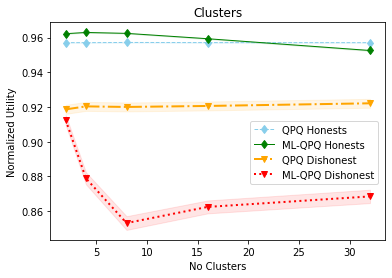

In [11]:
####################
# Sim Cluster
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numclusters': [] 
             }
confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
                        
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsLow2'].append(float(0))
                        simresults['confidence_intervalDishonestsHigh1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float(0))

                    simresults['numclusters'].append(numclusters)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'numclusters', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honests")
plt.plot( 'numclusters', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honests")
plt.fill_between('numclusters','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('numclusters','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'numclusters', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'numclusters', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('numclusters','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('numclusters','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("Clusters")
plt.xlabel("No Clusters")
plt.ylabel("Normalized Utility");
plt.legend(bbox_to_anchor=(0.58, 0.57), loc='upper left')
#plt.savefig(commondir + 'images/noclusters.eps', format='eps')
plt.savefig(commondir + 'images/noclusters.pdf', format='pdf')

Note: it seems that the optimal value of QPQ 2 corresponds to 8 clusters. Number of players is the same as the number of the cluster. The KS test is identical in both directions.
We propose to do a simulation with more players and more clusters to see if it is still valid that the optimal one is in Sqrt (players).

In [12]:
####################
# Sim Cluster 2
####################
dir = commondir + 'sim-clusters-256players-v2/results'

# History length
historyLenArray = [100] 
alpha = 1 


# Number of players
numplayersArray = [256]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [2, 4, 8, 16, 32, 64, 128]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        # print("Reading file ", fname," using numplayers =", numplayers, 
                        #     " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

C:\Users\AgustinSantos\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,FNTotalDishonest,FNTotalDishonest_HL,FNTotalHonest,FNTotalHonest_HL,QPQ2HL0,QPQ2HL1,QPQ2TH0,QPQ2TH1,QPQHL,QPQTH,...,UtilityDishonest_HL,UtilityHonest,UtilityHonest_HL,alpha,betafactor,clusters,numliars,playerperclusters,players,rounds
0,0.049,0.001111,0.011110,0.011678,NaN,NaN,NaN,NaN,100,0.97,...,4.894691e-05,0.000033,0.000036,NaN,1.2,2,1,256,256,1000
1,0.000,0.000000,0.000000,0.000000,196.0,196.0,0.98458,0.98458,100,0.97,...,4.894691e-05,0.000020,0.000023,1.0,1.2,2,1,128,256,1000
2,0.022,0.025556,0.011192,0.011181,NaN,NaN,NaN,NaN,100,0.97,...,6.236482e-05,0.000030,0.000029,NaN,1.2,2,1,256,256,1000
3,0.000,0.000000,0.000000,0.000000,196.0,196.0,0.98458,0.98458,100,0.97,...,3.899925e-05,0.000024,0.000024,1.0,1.2,2,1,128,256,1000
4,0.067,0.030000,0.011663,0.011804,NaN,NaN,NaN,NaN,100,0.97,...,1.096318e-05,0.000039,0.000042,NaN,1.2,2,1,256,256,1000
5,0.000,0.000000,0.000008,0.000000,196.0,196.0,0.98458,0.98458,100,0.97,...,1.096318e-05,0.000022,0.000022,1.0,1.2,2,1,128,256,1000
6,0.078,0.020000,0.012486,0.013011,NaN,NaN,NaN,NaN,100,0.97,...,9.224149e-07,0.000028,0.000029,NaN,1.2,2,1,256,256,1000
7,0.000,0.000000,0.000004,0.000000,196.0,196.0,0.98458,0.98458,100,0.97,...,5.940444e-06,0.000025,0.000026,1.0,1.2,2,1,128,256,1000
8,0.098,0.024444,0.010996,0.011599,NaN,NaN,NaN,NaN,100,0.97,...,3.366493e-05,0.000035,0.000037,NaN,1.2,2,1,256,256,1000
9,0.000,0.000000,0.000008,0.000000,196.0,196.0,0.98458,0.98458,100,0.97,...,3.366493e-05,0.000027,0.000030,1.0,1.2,2,1,128,256,1000


3.875121530953719e-05 0.9802878812258231 0.9800308742972108
3.866950781500637e-05 0.9803316008085458 0.9800708231888877
3.916368882383784e-05 0.9800824003809022 0.9798139822634878
3.881176603109841e-05 0.9802610011437046 0.9799957504404506
3.871629129565973e-05 0.9803103112556386 0.9800442064576058
3.8442384717986725e-05 0.9804576049291889 0.9801773931195927
3.864289323312213e-05 0.9803554001635548 0.9800742771657281


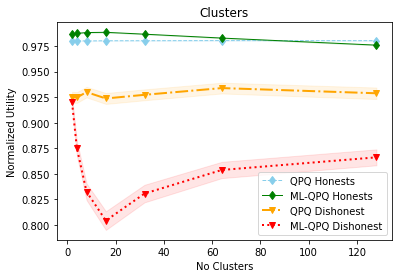

In [13]:
####################
# Sim Cluster
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numclusters': [] 
             }

confidence_level = 0.95
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
 
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsLow2'].append(float(0))
                        simresults['confidence_intervalDishonestsHigh1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float(0))

                    simresults['numclusters'].append(numclusters)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'numclusters', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honests")
plt.plot( 'numclusters', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honests")
plt.fill_between('numclusters','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('numclusters','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'numclusters', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'numclusters', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('numclusters','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('numclusters','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("Clusters")
plt.xlabel("No Clusters")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/noclusters.eps', format='eps')
plt.savefig(commondir + 'images/noclusters256.pdf', format='pdf')

# Sim Dishonest

In [14]:
####################
# Sim Dishonest
####################
dir = commondir + 'sim-dishonest-random-v2/results'

# History length
historyLenArray = [100] 
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

C:\Users\AgustinSantos\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,FNTotalDishonest,FNTotalDishonest_HL,FNTotalHonest,FNTotalHonest_HL,QPQ2HL0,QPQ2HL1,QPQ2TH0,QPQ2TH1,QPQHL,QPQTH,...,UtilityDishonest_HL,UtilityHonest,UtilityHonest_HL,alpha,betafactor,clusters,numliars,playerperclusters,players,rounds
0,NaN,NaN,0.017422,0.018177,NaN,NaN,NaN,NaN,100,0.97,...,NaN,0.000364,0.000374,NaN,1.2,8,0,64,64,1000
1,NaN,NaN,0.000281,0.000000,400.0,400.0,0.981637,0.981637,100,0.97,...,NaN,0.000276,0.000273,1.0,1.2,8,0,8,64,1000
2,NaN,NaN,0.015359,0.016319,NaN,NaN,NaN,NaN,100,0.97,...,NaN,0.000386,0.000398,NaN,1.2,8,0,64,64,1000
3,NaN,NaN,0.006625,0.007118,400.0,400.0,0.981637,0.981637,100,0.97,...,NaN,0.000298,0.000299,1.0,1.2,8,0,8,64,1000
4,NaN,NaN,0.012266,0.012604,NaN,NaN,NaN,NaN,100,0.97,...,NaN,0.000326,0.000337,NaN,1.2,8,0,64,64,1000
5,NaN,NaN,0.000000,0.000000,400.0,400.0,0.981637,0.981637,100,0.97,...,NaN,0.000352,0.000330,1.0,1.2,8,0,8,64,1000
6,NaN,NaN,0.013094,0.013993,NaN,NaN,NaN,NaN,100,0.97,...,NaN,0.000437,0.000463,NaN,1.2,8,0,64,64,1000
7,NaN,NaN,0.000313,0.000017,400.0,400.0,0.981637,0.981637,100,0.97,...,NaN,0.000255,0.000261,1.0,1.2,8,0,8,64,1000
8,NaN,NaN,0.011484,0.011493,NaN,NaN,NaN,NaN,100,0.97,...,NaN,0.000309,0.000320,NaN,1.2,8,0,64,64,1000
9,NaN,NaN,0.013875,0.014861,400.0,400.0,0.981637,0.981637,100,0.97,...,NaN,0.000312,0.000323,1.0,1.2,8,0,8,64,1000


In [15]:
####################
# Sim Dishonest
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'numLiars': [] 
             }

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                    else:
                        simresults['UtilityDishonests1'].append(float('NaN'))
                        simresults['UtilityDishonests2'].append(float('NaN'))
                        simresults['QPQ/QPQ2_Dishonests'].append(float('NaN'))
                        
                    simresults['numLiars'].append(numLiars)
                    
                    print("\nSimulation using numplayers =", numplayers, " numclusters = ", numclusters, 
                          " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                    if dfTmp1.UtilityHonest.empty or dfTmp2.UtilityHonest.empty:
                        print("\tDataFrame is empty!")
                        continue
                    else:
                        print("\tDataFrame has", len( dfTmp1.UtilityHonest), " simulations.")
                    print("\tPlayer Utility QPQ. All honest players: {:.5f}".format(UtilityHonests1))
                    print("\tPlayer Utility QPQ2. All honest players: {:.5f}".format(UtilityHonests2))
                    print("\tPlayer Utility Ratio QPQ/QPQ2. All honest players: {:.5f}".format(UtilityHonests1/UtilityHonests2))
      


Simulation using numplayers = 64  numclusters =  8  numLiars =  0  betafactor =  1.2  and historyLen =  100
	DataFrame has 5250  simulations.
	Player Utility QPQ. All honest players: 0.00033
	Player Utility QPQ2. All honest players: 0.00029
	Player Utility Ratio QPQ/QPQ2. All honest players: 1.14399

Simulation using numplayers = 64  numclusters =  8  numLiars =  1  betafactor =  1.2  and historyLen =  100
	DataFrame has 5250  simulations.
	Player Utility QPQ. All honest players: 0.00033
	Player Utility QPQ2. All honest players: 0.00029
	Player Utility Ratio QPQ/QPQ2. All honest players: 1.14050

Simulation using numplayers = 64  numclusters =  8  numLiars =  2  betafactor =  1.2  and historyLen =  100
	DataFrame has 5200  simulations.
	Player Utility QPQ. All honest players: 0.00034
	Player Utility QPQ2. All honest players: 0.00030
	Player Utility Ratio QPQ/QPQ2. All honest players: 1.13292

Simulation using numplayers = 64  numclusters =  8  numLiars =  3  betafactor =  1.2  and his

In [16]:
writer = pd.ExcelWriter(commondir + 'SimDishonest.xlsx', engine='xlsxwriter')
df.to_excel(writer,index=False)
writer.save() 

0.0003317962419224791 0.9576515088441877 0.9574086532236576
0.00033471387968214846 0.9572788367832437 0.9570344100181264
0.0003387975857418438 0.9567586954241836 0.9565091226259044
0.0003440567327530899 0.9560886064701717 0.9558328699450374
0.0003481196094061223 0.9555722924622764 0.9553090875297563
0.0003517470467845549 0.9551074119830101 0.9548453440401439
0.0003560744498454727 0.9545563318133734 0.9542886090261856
0.00036023348107196834 0.9540255802734796 0.9537546485720965
0.00036537228338844095 0.9533726717681745 0.9530920236843846


,UtilityHonests1,UtilityHonests2,QPQ/QPQ2_Honests,UtilityDishonests1,UtilityDishonests2,QPQ/QPQ2_Dishonests,confidence_intervalHonestsLow1,confidence_intervalHonestsLow2,confidence_intervalDishonestsLow1,confidence_intervalDishonestsLow2,confidence_intervalHonestsHigh1,confidence_intervalHonestsHigh2,confidence_intervalDishonestsHigh1,confidence_intervalDishonestsHigh2,numLiars
0,0.957530,0.962876,1.143995,NaN,NaN,NaN,0.957652,0.962992,NaN,NaN,0.957409,0.962759,NaN,NaN,0
1,0.957157,0.962435,1.140498,0.920298,0.856496,0.555396,0.957279,0.962551,0.922611,0.860046,0.957034,0.962318,0.917986,0.852945,1
2,0.956634,0.961722,1.132922,0.920275,0.855216,0.550648,0.956759,0.961846,0.921956,0.857774,0.956509,0.961598,0.918595,0.852659,2
3,0.955961,0.960969,1.128321,0.919212,0.853977,0.553258,0.956089,0.961097,0.920594,0.856127,0.955833,0.960841,0.917830,0.851828,3
4,0.955441,0.960315,1.122815,0.919888,0.855927,0.556050,0.955572,0.960454,0.921091,0.857800,0.955309,0.960175,0.918685,0.854053,4
5,0.954976,0.959552,1.113111,0.917058,0.852487,0.562270,0.955107,0.959695,0.918151,0.854150,0.954845,0.959408,0.915965,0.850825,5
6,0.954422,0.958537,1.099221,0.917351,0.853316,0.563445,0.954556,0.958687,0.918348,0.854884,0.954289,0.958386,0.916354,0.851747,6
7,0.953890,0.957627,1.088195,0.916786,0.854306,0.571159,0.954026,0.957784,0.917706,0.855746,0.953755,0.957471,0.915865,0.852865,7
8,0.953232,0.956553,1.076439,0.915274,0.852279,0.573553,0.953373,0.956719,0.916147,0.853604,0.953092,0.956388,0.914402,0.850954,8


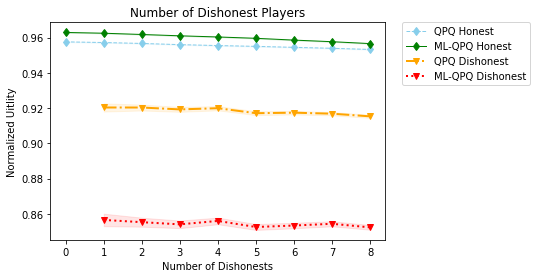

In [17]:
####################
# Sim Dishonest
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numLiars': [] 
             }

confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                           
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
                        
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()
                        
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(float('NaN'))
                        simresults['UtilityDishonests2'].append(float('NaN'))
                        simresults['QPQ/QPQ2_Dishonests'].append(float('NaN'))
                        simresults['confidence_intervalDishonestsLow1'].append(float('NaN')) 
                        simresults['confidence_intervalDishonestsLow2'].append(float('NaN'))
                        simresults['confidence_intervalDishonestsHigh1'].append(float('NaN')) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float('NaN'))

                    simresults['numLiars'].append(numLiars)
                    
rst = pd.DataFrame(data=simresults) 
# multiple line plot
plt.plot( 'numLiars', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'numLiars', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
plt.fill_between('numLiars','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('numLiars','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'numLiars', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'numLiars', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('numLiars','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('numLiars','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("Number of Dishonest Players")
plt.xlabel("Number of Dishonests")
plt.ylabel("Normalized Uitlity");
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.savefig(commondir + 'images/numliars.eps', format='eps')
plt.savefig(commondir + 'images/numliars.pdf', format='pdf')
rst

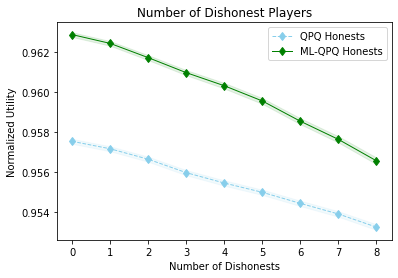

In [18]:
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'numLiars', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honests")
plt.plot( 'numLiars', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honests")
plt.fill_between('numLiars','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('numLiars','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.title("Number of Dishonest Players")
plt.xlabel("Number of Dishonests")
plt.ylabel("Normalized Utility");
plt.legend()
plt.savefig(commondir + 'images/numliarsonlyhonests.pdf', format='pdf')

# Sim Players

In [19]:
####################
# Sim Players
####################
dir = commondir + 'sim-players/results'

# History length
historyLenArray = [100] 
alpha = 1 

# Number of players
numplayersArray = [16, 32, 64, 128, 256]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [0, 1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.003728,NaN,0.006250,NaN,0.003748,NaN,0.006458,NaN
1,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.003695,NaN,0.002437,NaN,0.003711,NaN,0.002569,NaN
2,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.004099,NaN,0.021375,NaN,0.004148,NaN,0.023611,NaN
3,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.005244,NaN,0.053187,NaN,0.005409,NaN,0.058958,NaN
4,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.003931,NaN,0.015375,NaN,0.003981,NaN,0.016736,NaN
5,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.003905,NaN,0.000000,NaN,0.003954,NaN,0.000000,NaN
6,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.004095,NaN,0.017500,NaN,0.004157,NaN,0.018403,NaN
7,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.004272,NaN,0.018562,NaN,0.004355,NaN,0.020000,NaN
8,16,8,16,0,1,NaN,1000,1.2,100,0.97,...,NaN,NaN,0.003952,NaN,0.011062,NaN,0.004001,NaN,0.010694,NaN
9,16,8,2,0,2,1.0,1000,1.2,100,0.97,...,160.0,0.975477,0.003779,NaN,0.004938,NaN,0.003736,NaN,0.002222,NaN


In [20]:
writer = pd.ExcelWriter(commondir + 'SimPlayers.xlsx', engine='xlsxwriter')
df.to_excel(writer,index=False)
writer.save()

In [21]:
####################
# Sim Players
####################
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor)]

                    dfTmp1Honests = dfTmp1[(dfTmp1.numliars == 0)]
                    dfTmp1Mix = dfTmp1[(dfTmp1.numliars == 1)]

                    dfTmp2Honests = dfTmp2[(dfTmp2.numliars == 0)]
                    dfTmp2Mix = dfTmp2[(dfTmp2.numliars == 1)]

                    UtilityHonests1 = dfTmp1Honests.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2Honests.UtilityHonest.mean()

                    UtilityMixHonests1 = dfTmp1Mix.UtilityHonest.mean()
                    UtilityMixHonests2 = dfTmp2Mix.UtilityHonest.mean()
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1Mix.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2Mix.UtilityDishonest.mean()

                    print("\nSimulation using numplayers =", numplayers, " numclusters = ", numclusters, 
                          " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                    if dfTmp1Honests.empty or dfTmp2Honests.empty:
                        print("\tDataFrame is empty!")
                        continue
                    else:
                        print("\tDataFrame has", len( dfTmp1Honests), " simulations.")
                    print("\tPlayer Utility QPQ. All honest players: {:.5f}".format(UtilityHonests1))
                    print("\tPlayer Utility QPQ2. All honest players: {:.5f}".format(UtilityHonests2))
                    print("\tPlayer Utility Ratio QPQ/QPQ2. All honest players: {:.5f}".format(UtilityHonests1/UtilityHonests2))
                    if (numLiars > 0):
                        print("\n\tPlayer Utility QPQ. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1, UtilityMixDishonests1))
                        print("\tPlayer Utility QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests2, UtilityMixDishonests2))
                        print("\tPlayer Utility Ratio QPQ/QPQ2. Honest players: {:.5f}, Dishonest player: {:.5f}".format(UtilityMixHonests1/UtilityMixHonests2, UtilityMixDishonests1/UtilityMixDishonests2))


Simulation using numplayers = 16  numclusters =  8  numLiars =  0  betafactor =  1.2  and historyLen =  100
	DataFrame has 3050  simulations.
	Player Utility QPQ. All honest players: 0.00401
	Player Utility QPQ2. All honest players: 0.00413
	Player Utility Ratio QPQ/QPQ2. All honest players: 0.97103

Simulation using numplayers = 16  numclusters =  8  numLiars =  1  betafactor =  1.2  and historyLen =  100
	DataFrame has 3050  simulations.
	Player Utility QPQ. All honest players: 0.00401
	Player Utility QPQ2. All honest players: 0.00413
	Player Utility Ratio QPQ/QPQ2. All honest players: 0.97103

	Player Utility QPQ. Honest players: 0.00415, Dishonest player: 0.00393
	Player Utility QPQ2. Honest players: 0.00432, Dishonest player: 0.00509
	Player Utility Ratio QPQ/QPQ2. Honest players: 0.96177, Dishonest player: 0.77190

Simulation using numplayers = 32  numclusters =  8  numLiars =  0  betafactor =  1.2  and historyLen =  100
	DataFrame has 3050  simulations.
	Player Utility QPQ. All

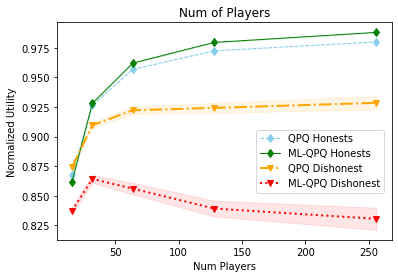

In [22]:
####################
# Sim Players
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numplayers': [] 
             }

confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate([1]):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]

                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
 
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(float('NaN'))
                        simresults['UtilityDishonests2'].append(float('NaN'))
                        simresults['QPQ/QPQ2_Dishonests'].append(float('NaN'))
                        simresults['confidence_intervalDishonestsLow1'].append(float('NaN')) 
                        simresults['confidence_intervalDishonestsLow2'].append(float('NaN'))
                        simresults['confidence_intervalDishonestsHigh1'].append(float('NaN')) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float('NaN'))

                    simresults['numplayers'].append(numplayers)
                    
                    
rst = pd.DataFrame(data=simresults) 
# multiple line plot
plt.plot( 'numplayers', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honests")
plt.plot( 'numplayers', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honests")
plt.fill_between('numplayers','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('numplayers','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'numplayers', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'numplayers', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('numplayers','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('numplayers','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("Num of Players")
plt.xlabel("Num Players")
plt.ylabel("Normalized Utility");
plt.legend(bbox_to_anchor=(0.58, 0.53), loc='upper left')
#plt.savefig(commondir + 'images/numplayers.eps', format='eps')
plt.savefig(commondir + 'images/numplayers.pdf', format='pdf')

0.004005834511892803 0.8720315589500521 0.8715950322888084
0.0011225276377018747 0.9283373895792131 0.927979072794947
0.0003306713541955733 0.9578330129208031 0.9575151204051301
0.00010702002723272605 0.9727532772882699 0.9724524687685744
3.874131149913608e-05 0.9803076900133694 0.9800212070115153


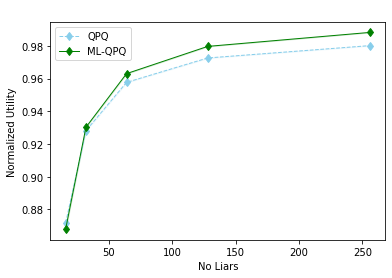

In [23]:
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'numplayers': [] 
             }

confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate([0]):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars)]

                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()
                    
                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
 
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsLow2'].append(float(0))
                        simresults['confidence_intervalDishonestsHigh1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float(0))
                        
                    simresults['numplayers'].append(numplayers)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'numplayers', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ")
plt.plot( 'numplayers', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ")
plt.fill_between('numplayers','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('numplayers','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.title(" ")
plt.xlabel("No Liars")
plt.ylabel("Normalized Utility");
plt.legend()

# Sim History Length

In [24]:
####################
# Sim History Len
####################
dir = commondir + 'sim-history/results'

# History length
historyLenArray = [100, 300, 1000, 3000] 
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

C:\Users\AgustinSantos\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,FNTotalDishonest,FNTotalDishonest_HL,FNTotalHonest,FNTotalHonest_HL,QPQ2HL0,QPQ2HL1,QPQ2TH0,QPQ2TH1,QPQHL,QPQTH,...,UtilityDishonest_HL,UtilityHonest,UtilityHonest_HL,alpha,betafactor,clusters,numliars,playerperclusters,players,rounds
0,0.116,0.126667,0.009794,0.009877,NaN,NaN,NaN,NaN,100,0.97,...,0.000036,0.000317,0.000301,NaN,1.2,8,1,64,64,1000
1,0.000,0.000000,0.000000,0.000000,400.0,400.0,0.981637,0.981637,100,0.97,...,0.001877,0.000294,0.000292,1.0,1.2,8,1,8,64,1000
2,0.027,0.030000,0.012492,0.012875,NaN,NaN,NaN,NaN,100,0.97,...,0.000106,0.000410,0.000423,NaN,1.2,8,1,64,64,1000
3,0.000,0.000000,0.000524,0.000476,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000718,0.000306,0.000314,1.0,1.2,8,1,8,64,1000
4,0.031,0.034444,0.012714,0.012857,NaN,NaN,NaN,NaN,100,0.97,...,0.000060,0.000334,0.000326,NaN,1.2,8,1,64,64,1000
5,0.000,0.000000,0.000302,0.000212,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000558,0.000268,0.000269,1.0,1.2,8,1,8,64,1000
6,0.024,0.026667,0.013016,0.013051,NaN,NaN,NaN,NaN,100,0.97,...,0.002279,0.000365,0.000381,NaN,1.2,8,1,64,64,1000
7,0.000,0.000000,0.000048,0.000000,400.0,400.0,0.981637,0.981637,100,0.97,...,0.001465,0.000279,0.000272,1.0,1.2,8,1,8,64,1000
8,0.108,0.120000,0.011127,0.011199,NaN,NaN,NaN,NaN,100,0.97,...,0.001804,0.000306,0.000314,NaN,1.2,8,1,64,64,1000
9,0.001,0.000000,0.002683,0.002716,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000362,0.000331,0.000343,1.0,1.2,8,1,8,64,1000


0.0003353719611417494 0.9573480482007948 0.9567967297469173
0.0002996890775395636 0.9617733184208638 0.961506277729008
0.0002760441146087229 0.9647630366553525 0.9645696700048145
0.00026368583672347744 0.9663400227414971 0.9661564030572927


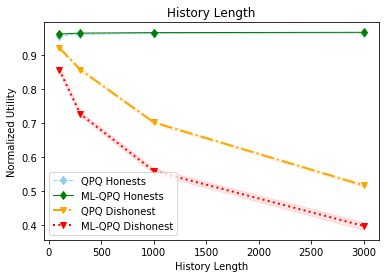

In [25]:
####################
# Sim History Len
####################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'historyLen': [] 
             }

confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)

                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, confidence_intervalH1[0], confidence_intervalH1[1])
                    print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 
 
                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                       
                        # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsLow2'].append(float(0))
                        simresults['confidence_intervalDishonestsHigh1'].append(float(0)) 
                        simresults['confidence_intervalDishonestsHigh2'].append(float(0))

                    simresults['historyLen'].append(historyLen)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'historyLen', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honests")
plt.plot( 'historyLen', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honests")
plt.fill_between('historyLen','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
plt.fill_between('historyLen','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'historyLen', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'historyLen', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('historyLen','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('historyLen','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("History Length")
plt.xlabel("History Length")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/historylen.eps', format='eps')
plt.savefig(commondir + 'images/historylen.pdf', format='pdf')

In [26]:
##########################
# Sim History Len Beta1.05
#########################
dir = commondir + 'sim-history-beta1.05-v2/results'

# History length
historyLenArray = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] 
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.05]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

C:\Users\AgustinSantos\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,FNTotalDishonest,FNTotalDishonest_HL,FNTotalHonest,FNTotalHonest_HL,QPQ2HL0,QPQ2HL1,QPQ2TH0,QPQ2TH1,QPQHL,QPQTH,...,UtilityDishonest_HL,UtilityHonest,UtilityHonest_HL,alpha,betafactor,clusters,numliars,playerperclusters,players,rounds
0,0.000,0.013333,0.013365,0.013545,NaN,NaN,NaN,NaN,100,0.97,...,0.000192,0.000391,0.000389,NaN,1.05,8,1,64,64,1000
1,0.001,0.000000,0.001254,0.001199,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000192,0.000337,0.000335,1.0,1.05,8,1,8,64,1000
2,0.022,0.000000,0.011444,0.011534,NaN,NaN,NaN,NaN,100,0.97,...,0.000298,0.000381,0.000348,NaN,1.05,8,1,64,64,1000
3,0.001,0.000000,0.005333,0.005397,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000280,0.000309,0.000310,1.0,1.05,8,1,8,64,1000
4,0.005,0.000000,0.013635,0.014356,NaN,NaN,NaN,NaN,100,0.97,...,0.000181,0.000355,0.000353,NaN,1.05,8,1,64,64,1000
5,0.000,0.000000,0.001365,0.000776,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000192,0.000343,0.000335,1.0,1.05,8,1,8,64,1000
6,0.004,0.010000,0.010937,0.010741,NaN,NaN,NaN,NaN,100,0.97,...,0.000383,0.000341,0.000354,NaN,1.05,8,1,64,64,1000
7,0.000,0.000000,0.004508,0.004991,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000356,0.000270,0.000258,1.0,1.05,8,1,8,64,1000
8,0.007,0.003333,0.011413,0.011869,NaN,NaN,NaN,NaN,100,0.97,...,0.000197,0.000332,0.000343,NaN,1.05,8,1,64,64,1000
9,0.000,0.000000,0.000508,0.000035,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000141,0.000266,0.000269,1.0,1.05,8,1,8,64,1000


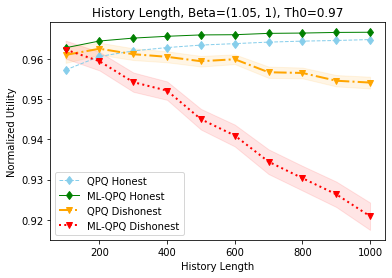

In [27]:
##########################
# Sim History Len Beta1.05
#########################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'historyLen': [] 
             }
confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                         # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(0) 
                        simresults['confidence_intervalDishonestsLow2'].append(0)
                        simresults['confidence_intervalDishonestsHigh1'].append(0) 
                        simresults['confidence_intervalDishonestsHigh2'].append(0)

                    simresults['historyLen'].append(historyLen)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'historyLen', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'historyLen', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
#plt.fill_between('historyLen','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
#plt.fill_between('historyLen','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'historyLen', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'historyLen', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('historyLen','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('historyLen','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("History Length, Beta=(1.05, 1), Th0=0.97")
plt.xlabel("History Length")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/historylenbeta1.05.eps', format='eps')
plt.savefig(commondir + 'images/historylenbeta1.05.pdf', format='pdf')

In [28]:
##########################
# Sim History Len Beta1.1
#########################
dir = commondir + 'sim-history-beta1.1-v2/results'

# History length
historyLenArray = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] 
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.1]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

C:\Users\AgustinSantos\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,FNTotalDishonest,FNTotalDishonest_HL,FNTotalHonest,FNTotalHonest_HL,QPQ2HL0,QPQ2HL1,QPQ2TH0,QPQ2TH1,QPQHL,QPQTH,...,UtilityDishonest_HL,UtilityHonest,UtilityHonest_HL,alpha,betafactor,clusters,numliars,playerperclusters,players,rounds
0,0.063,0.035556,0.011063,0.011817,NaN,NaN,NaN,NaN,100,0.97,...,0.000287,0.000305,0.000323,NaN,1.1,8,1,64,64,1000
1,0.070,0.000000,0.007984,0.010106,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000302,0.000309,0.000303,1.0,1.1,8,1,8,64,1000
2,0.006,0.004444,0.013619,0.014021,NaN,NaN,NaN,NaN,100,0.97,...,0.000242,0.000319,0.000323,NaN,1.1,8,1,64,64,1000
3,0.000,0.000000,0.001016,0.001129,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000242,0.000337,0.000346,1.0,1.1,8,1,8,64,1000
4,0.000,0.001111,0.011857,0.011887,NaN,NaN,NaN,NaN,100,0.97,...,0.000100,0.000341,0.000353,NaN,1.1,8,1,64,64,1000
5,0.000,0.000000,0.010238,0.010688,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000126,0.000311,0.000333,1.0,1.1,8,1,8,64,1000
6,0.013,0.004444,0.009778,0.010723,NaN,NaN,NaN,NaN,100,0.97,...,0.000440,0.000305,0.000307,NaN,1.1,8,1,64,64,1000
7,0.000,0.000000,0.000000,0.000000,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000440,0.000274,0.000273,1.0,1.1,8,1,8,64,1000
8,0.028,0.000000,0.015000,0.016208,NaN,NaN,NaN,NaN,100,0.97,...,0.000282,0.000379,0.000400,NaN,1.1,8,1,64,64,1000
9,0.000,0.000000,0.000016,0.000000,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000282,0.000279,0.000280,1.0,1.1,8,1,8,64,1000


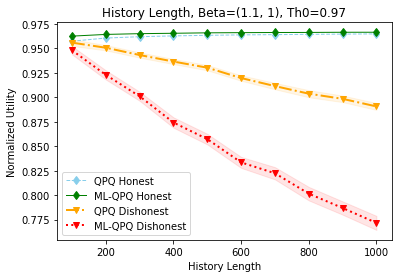

In [29]:
##########################
# Sim History Len Beta1.1
#########################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'historyLen': [] 
             }
confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                         # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(0) 
                        simresults['confidence_intervalDishonestsLow2'].append(0)
                        simresults['confidence_intervalDishonestsHigh1'].append(0) 
                        simresults['confidence_intervalDishonestsHigh2'].append(0)

                    simresults['historyLen'].append(historyLen)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'historyLen', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'historyLen', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
#plt.fill_between('historyLen','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
#plt.fill_between('historyLen','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'historyLen', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'historyLen', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('historyLen','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('historyLen','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("History Length, Beta=(1.1, 1), Th0=0.97")
plt.xlabel("History Length")
plt.ylabel("Normalized Utility");
plt.legend()
#plt.savefig(commondir + 'images/historylenbeta1.1.eps', format='eps')
plt.savefig(commondir + 'images/historylenbeta1.1.pdf', format='pdf')

In [30]:
##########################
# Sim History Len Beta1.2
#########################
dir = commondir + 'sim-history-beta1.2-v2/results'

# History length
historyLenArray = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] 
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.2]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

C:\Users\AgustinSantos\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,FNTotalDishonest,FNTotalDishonest_HL,FNTotalHonest,FNTotalHonest_HL,QPQ2HL0,QPQ2HL1,QPQ2TH0,QPQ2TH1,QPQHL,QPQTH,...,UtilityDishonest_HL,UtilityHonest,UtilityHonest_HL,alpha,betafactor,clusters,numliars,playerperclusters,players,rounds
0,0.069,0.076667,0.011683,0.012293,NaN,NaN,NaN,NaN,100,0.97,...,0.000106,0.000306,0.000315,NaN,1.2,8,1,64,64,1000
1,0.000,0.000000,0.002349,0.000935,400.0,400.0,0.981637,0.981637,100,0.97,...,0.001514,0.000271,0.000268,1.0,1.2,8,1,8,64,1000
2,0.082,0.001111,0.010397,0.011517,NaN,NaN,NaN,NaN,100,0.97,...,0.000273,0.000319,0.000321,NaN,1.2,8,1,64,64,1000
3,0.000,0.000000,0.010238,0.011270,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000273,0.000303,0.000321,1.0,1.2,8,1,8,64,1000
4,0.067,0.003333,0.012190,0.013827,NaN,NaN,NaN,NaN,100,0.97,...,0.000227,0.000327,0.000337,NaN,1.2,8,1,64,64,1000
5,0.071,0.000000,0.011302,0.013527,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000199,0.000366,0.000363,1.0,1.2,8,1,8,64,1000
6,0.062,0.000000,0.012587,0.013880,NaN,NaN,NaN,NaN,100,0.97,...,0.000229,0.000346,0.000329,NaN,1.2,8,1,64,64,1000
7,0.000,0.000000,0.005683,0.006314,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000250,0.000300,0.000347,1.0,1.2,8,1,8,64,1000
8,0.038,0.006667,0.008444,0.009347,NaN,NaN,NaN,NaN,100,0.97,...,0.000130,0.000289,0.000319,NaN,1.2,8,1,64,64,1000
9,0.000,0.000000,0.001143,0.000935,400.0,400.0,0.981637,0.981637,100,0.97,...,0.000163,0.000289,0.000322,1.0,1.2,8,1,8,64,1000


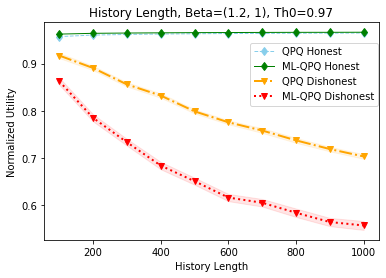

In [31]:
##########################
# Sim History Len Beta1.2
#########################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'historyLen': [] 
             }
confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                         # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(0) 
                        simresults['confidence_intervalDishonestsLow2'].append(0)
                        simresults['confidence_intervalDishonestsHigh1'].append(0) 
                        simresults['confidence_intervalDishonestsHigh2'].append(0)

                    simresults['historyLen'].append(historyLen)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'historyLen', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'historyLen', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
#plt.fill_between('historyLen','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
#plt.fill_between('historyLen','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'historyLen', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'historyLen', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('historyLen','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('historyLen','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("History Length, Beta=(1.2, 1), Th0=0.97")
plt.xlabel("History Length")
plt.ylabel("Normalized Utility");
plt.legend(bbox_to_anchor=(0.6, 0.93), loc='upper left')
#plt.savefig(commondir + 'images/historylenbeta1.2.eps', format='eps')
plt.savefig(commondir + 'images/historylenbeta1.2.pdf', format='pdf')

#  Threshold

In [32]:
##########################
# Sim History Len Beta1.05 with threshold 0.98
#########################
dir = commondir + 'sim-history-beta1.05-th0.98/results'

# History length
historyLenArray = [100, 200, 300] 
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.05]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,1,1,NaN,1000,1.05,100,0.98,...,NaN,NaN,0.000253,0.000299,0.004825,0.011,0.000240,0.000215,0.004903,0.000000
1,64,8,8,1,2,1.0,1000,1.05,100,0.98,...,400.0,0.987782,0.000310,0.000267,0.000000,0.000,0.000321,0.000215,0.000000,0.000000
2,64,8,64,1,1,NaN,1000,1.05,100,0.98,...,NaN,NaN,0.000340,0.000096,0.010302,0.009,0.000331,0.000331,0.010741,0.010000
3,64,8,8,1,2,1.0,1000,1.05,100,0.98,...,400.0,0.987782,0.000311,0.000096,0.000032,0.000,0.000299,0.000291,0.000000,0.000000
4,64,8,64,1,1,NaN,1000,1.05,100,0.98,...,NaN,NaN,0.000311,0.000106,0.006270,0.000,0.000302,0.000384,0.006314,0.005556
5,64,8,8,1,2,1.0,1000,1.05,100,0.98,...,400.0,0.987782,0.000254,0.000106,0.000159,0.000,0.000250,0.000384,0.000000,0.000000
6,64,8,64,1,1,NaN,1000,1.05,100,0.98,...,NaN,NaN,0.000311,0.000214,0.007889,0.009,0.000272,0.001151,0.008219,0.012222
7,64,8,8,1,2,1.0,1000,1.05,100,0.98,...,400.0,0.987782,0.000289,0.000249,0.000413,0.000,0.000260,0.000229,0.000053,0.000000
8,64,8,64,1,1,NaN,1000,1.05,100,0.98,...,NaN,NaN,0.000339,0.000161,0.008968,0.000,0.000343,0.000285,0.009189,0.000000
9,64,8,8,1,2,1.0,1000,1.05,100,0.98,...,400.0,0.987782,0.000264,0.000161,0.001000,0.008,0.000263,0.000285,0.001252,0.000000


0.0002648676423391267 0.0002576778971360224 0.00027205738754223103
0.00025732746183244946 0.00025182598760557345 0.0002628289360593255
0.00026235242916630307 0.00025748783797940064 0.0002672170203532055


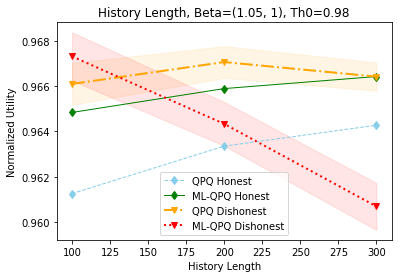

In [33]:
##########################
# Sim History Len Beta1.05  with threshold 0.98
#########################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'historyLen': [] 
             }
confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                         # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(0) 
                        simresults['confidence_intervalDishonestsLow2'].append(0)
                        simresults['confidence_intervalDishonestsHigh1'].append(0) 
                        simresults['confidence_intervalDishonestsHigh2'].append(0)

                    simresults['historyLen'].append(historyLen)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'historyLen', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'historyLen', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
#plt.fill_between('historyLen','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
#plt.fill_between('historyLen','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'historyLen', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'historyLen', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('historyLen','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('historyLen','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("History Length, Beta=(1.05, 1), Th0=0.98")
plt.xlabel("History Length")
plt.ylabel("Normalized Utility");
plt.legend()

plt.savefig(commondir + 'images/historylenbeta1.05-th0.98.pdf', format='pdf')

In [34]:
##########################
# Sim History Len Beta1.05 with threshold 0.985
#########################
dir = commondir + 'sim-history-beta1.05-th0.985/results'

# History length
historyLenArray = [100, 200, 300]
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.05]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,1,1,NaN,1000,1.05,100,0.985,...,NaN,NaN,0.000274,0.000143,0.005333,0.000,0.000276,0.000294,0.005503,0.000000
1,64,8,8,1,2,1.0,1000,1.05,100,0.985,...,400.0,0.990846,0.000298,0.000143,0.000825,0.000,0.000301,0.000294,0.000247,0.000000
2,64,8,64,1,1,NaN,1000,1.05,100,0.985,...,NaN,NaN,0.000298,0.000082,0.004937,0.000,0.000283,0.000200,0.004921,0.006667
3,64,8,8,1,2,1.0,1000,1.05,100,0.985,...,400.0,0.990846,0.000263,0.000082,0.000063,0.000,0.000238,0.000786,0.000000,0.000000
4,64,8,64,1,1,NaN,1000,1.05,100,0.985,...,NaN,NaN,0.000270,0.000728,0.006048,0.023,0.000281,0.000225,0.006755,0.000000
5,64,8,8,1,2,1.0,1000,1.05,100,0.985,...,400.0,0.990846,0.000239,0.000036,0.000000,0.000,0.000234,0.000225,0.000000,0.000000
6,64,8,64,1,1,NaN,1000,1.05,100,0.985,...,NaN,NaN,0.000286,0.000079,0.005508,0.000,0.000289,0.000187,0.005450,0.018889
7,64,8,8,1,2,1.0,1000,1.05,100,0.985,...,400.0,0.990846,0.000294,0.000079,0.000619,0.000,0.000298,0.000198,0.000635,0.000000
8,64,8,64,1,1,NaN,1000,1.05,100,0.985,...,NaN,NaN,0.000277,0.000227,0.005508,0.010,0.000268,0.000157,0.005750,0.000000
9,64,8,8,1,2,1.0,1000,1.05,100,0.985,...,400.0,0.990846,0.000274,0.000227,0.000016,0.000,0.000274,0.000157,0.000000,0.000000


0.00025473681707877067 0.0002475761447673738 0.0002618974893901675
0.00024175808497598286 0.0002367387461605593 0.0002467774237914064
0.000248538553870116 0.00024404235831358172 0.00025303474942665026


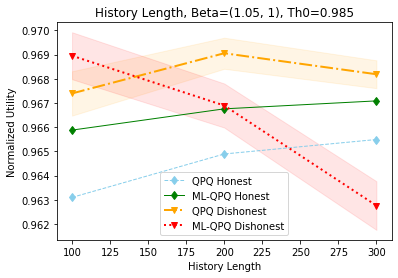

In [35]:
##########################
# Sim History Len Beta1.05  with threshold 0.985
#########################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'historyLen': [] 
             }
confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                         # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(0) 
                        simresults['confidence_intervalDishonestsLow2'].append(0)
                        simresults['confidence_intervalDishonestsHigh1'].append(0) 
                        simresults['confidence_intervalDishonestsHigh2'].append(0)

                    simresults['historyLen'].append(historyLen)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'historyLen', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'historyLen', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
#plt.fill_between('historyLen','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
#plt.fill_between('historyLen','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'historyLen', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'historyLen', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('historyLen','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('historyLen','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("History Length, Beta=(1.05, 1), Th0=0.985")
plt.xlabel("History Length")
plt.ylabel("Normalized Utility");
plt.legend()

plt.savefig(commondir + 'images/historylenbeta1.05-th0.985.pdf', format='pdf')

In [36]:
##########################
# Sim History Len Beta1.05 with threshold 0.99
#########################
dir = commondir + 'sim-history-beta1.05-th0.99/results'

# History length
historyLenArray = [100, 200, 300] 
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.05]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,1,1,NaN,1000,1.05,100,0.99,...,NaN,NaN,0.000287,0.000967,0.003127,0.004,0.000304,0.000267,0.003316,0.001111
1,64,8,8,1,2,1.0,1000,1.05,100,0.99,...,400.0,0.993903,0.000254,0.000219,0.000000,0.000,0.000254,0.000267,0.000000,0.000000
2,64,8,64,1,1,NaN,1000,1.05,100,0.99,...,NaN,NaN,0.000254,0.000074,0.004063,0.002,0.000249,0.000398,0.004250,0.002222
3,64,8,8,1,2,1.0,1000,1.05,100,0.99,...,400.0,0.993903,0.000300,0.000074,0.000143,0.000,0.000295,0.000398,0.000000,0.000000
4,64,8,64,1,1,NaN,1000,1.05,100,0.99,...,NaN,NaN,0.000281,0.000179,0.003302,0.000,0.000249,0.000308,0.002928,0.001111
5,64,8,8,1,2,1.0,1000,1.05,100,0.99,...,400.0,0.993903,0.000281,0.000179,0.000000,0.000,0.000280,0.000308,0.000000,0.000000
6,64,8,64,1,1,NaN,1000,1.05,100,0.99,...,NaN,NaN,0.000255,0.000281,0.001508,0.005,0.000259,0.000219,0.001605,0.000000
7,64,8,8,1,2,1.0,1000,1.05,100,0.99,...,400.0,0.993903,0.000254,0.000281,0.000000,0.000,0.000257,0.000219,0.000000,0.000000
8,64,8,64,1,1,NaN,1000,1.05,100,0.99,...,NaN,NaN,0.000256,0.000166,0.003429,0.000,0.000254,0.000299,0.003545,0.000000
9,64,8,8,1,2,1.0,1000,1.05,100,0.99,...,400.0,0.993903,0.000262,0.000166,0.000016,0.000,0.000244,0.000299,0.000000,0.000000


0.0002252937522312788 0.00021940999529004553 0.0002311775091725121
0.00022127259681984445 0.00021703205689458516 0.00022551313674510373
0.00022490799027933273 0.00022105052833518054 0.00022876545222348492


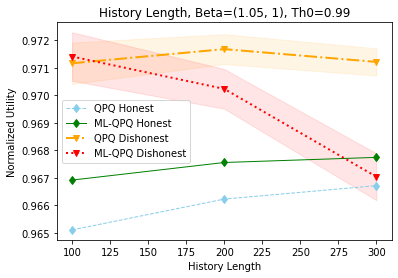

In [37]:
##########################
# Sim History Len Beta1.05  with threshold 0.99
#########################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'historyLen': [] 
             }
confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                         # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(0) 
                        simresults['confidence_intervalDishonestsLow2'].append(0)
                        simresults['confidence_intervalDishonestsHigh1'].append(0) 
                        simresults['confidence_intervalDishonestsHigh2'].append(0)

                    simresults['historyLen'].append(historyLen)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'historyLen', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'historyLen', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
#plt.fill_between('historyLen','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
#plt.fill_between('historyLen','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'historyLen', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'historyLen', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('historyLen','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('historyLen','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("History Length, Beta=(1.05, 1), Th0=0.99")
plt.xlabel("History Length")
plt.ylabel("Normalized Utility");
plt.legend()

plt.savefig(commondir + 'images/historylenbeta1.05-th0.99.pdf', format='pdf')

In [38]:
##########################
# Sim History Len Beta1.05 with threshold 0.95
#########################
dir = commondir + 'sim-history-beta1.05-th0.95/results'

# History length
historyLenArray = [100, 200, 300] 
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.05]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,1,1,NaN,1000,1.05,100,0.95,...,NaN,NaN,0.000371,0.000180,0.018333,0.045,0.000388,0.000229,0.019400,0.042222
1,64,8,8,1,2,1.0,1000,1.05,100,0.95,...,400.0,0.969271,0.000334,0.000160,0.002730,0.000,0.000348,0.000138,0.002152,0.000000
2,64,8,64,1,1,NaN,1000,1.05,100,0.95,...,NaN,NaN,0.000430,0.000523,0.019127,0.033,0.000444,0.000099,0.019101,0.054444
3,64,8,8,1,2,1.0,1000,1.05,100,0.95,...,400.0,0.969271,0.000334,0.000145,0.004952,0.026,0.000306,0.000112,0.004744,0.015556
4,64,8,64,1,1,NaN,1000,1.05,100,0.95,...,NaN,NaN,0.000380,0.000167,0.018302,0.010,0.000390,0.000098,0.019189,0.026667
5,64,8,8,1,2,1.0,1000,1.05,100,0.95,...,400.0,0.969271,0.000336,0.000218,0.008222,0.000,0.000312,0.002072,0.009136,0.000000
6,64,8,64,1,1,NaN,1000,1.05,100,0.95,...,NaN,NaN,0.000348,0.000285,0.014921,0.037,0.000358,0.000276,0.015397,0.007778
7,64,8,8,1,2,1.0,1000,1.05,100,0.95,...,400.0,0.969271,0.000252,0.000260,0.000016,0.000,0.000251,0.000276,0.000018,0.000000
8,64,8,64,1,1,NaN,1000,1.05,100,0.95,...,NaN,NaN,0.000341,0.000169,0.017730,0.003,0.000331,0.000191,0.017284,0.010000
9,64,8,8,1,2,1.0,1000,1.05,100,0.95,...,400.0,0.969271,0.000322,0.000145,0.015651,0.000,0.000303,0.000155,0.015150,0.000000


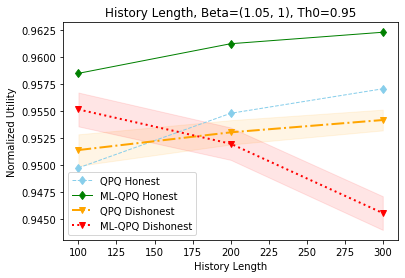

In [39]:
##########################
# Sim History Len Beta1.05 with threshold 0.95
#########################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'historyLen': [] 
             }
confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                         # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(0) 
                        simresults['confidence_intervalDishonestsLow2'].append(0)
                        simresults['confidence_intervalDishonestsHigh1'].append(0) 
                        simresults['confidence_intervalDishonestsHigh2'].append(0)

                    simresults['historyLen'].append(historyLen)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'historyLen', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'historyLen', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
#plt.fill_between('historyLen','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
#plt.fill_between('historyLen','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'historyLen', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'historyLen', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('historyLen','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('historyLen','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("History Length, Beta=(1.05, 1), Th0=0.95")
plt.xlabel("History Length")
plt.ylabel("Normalized Utility");
plt.legend()

plt.savefig(commondir + 'images/historylenbeta1.05-th0.95.pdf', format='pdf')

In [40]:
##########################
# Sim History Len Beta1.05 with threshold 0.90
#########################
dir = commondir + 'sim-history-beta1.05-th0.90/results'

# History length
historyLenArray = [100, 200, 300] 
alpha = 1 

# Number of players
numplayersArray = [64]

# betafactor (dishonest beta factor) Array
betafactorArray = [1.05]

# Number of Liars
numLiarsArray = [1]

# Number of clusters
numclustersArray = [8]


if not os.path.exists(dir):
    os.mkdir(dir)
    
frames=[]    
for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue

                    rounds = historyLen*10
                    file_name = 'QPQRst-{0}-{1}-{2}-{3}-{4}-{5}-{6}.csv'.format(str(numplayers),str(numclusters),str(rounds),str(betaFactor),str(numLiars),str(historyLen), "*")
                    search_path = os.path.join(dir, file_name)
                    for fname in glob.glob(search_path):
                        #print("Reading file ", fname," using numplayers =", numplayers, 
                        #      " numclusters = ", numclusters, " numLiars = ", numLiars, " betafactor = ", betaFactor, " and historyLen = ", historyLen)
                        tmpdf = pd.read_csv(fname)
                        frames.append(tmpdf)
                                    
df = pd.concat(frames, ignore_index=True)
df.head(20)

,players,clusters,playerperclusters,numliars,QPQversion,alpha,rounds,betafactor,QPQHL,QPQTH,...,QPQ2HL1,QPQ2TH1,UtilityHonest,UtilityDishonest,FNTotalHonest,FNTotalDishonest,UtilityHonest_HL,UtilityDishonest_HL,FNTotalHonest_HL,FNTotalDishonest_HL
0,64,8,64,1,1,NaN,1000,1.05,100,0.9,...,NaN,NaN,0.000539,0.000373,0.038825,0.053,0.000544,0.000342,0.041781,0.007778
1,64,8,8,1,2,1.0,1000,1.05,100,0.9,...,400.0,0.937902,0.000379,0.000243,0.009460,0.062,0.000379,0.000463,0.010864,0.000000
2,64,8,64,1,1,NaN,1000,1.05,100,0.9,...,NaN,NaN,0.000481,0.000671,0.041317,0.030,0.000506,0.000545,0.042116,0.020000
3,64,8,8,1,2,1.0,1000,1.05,100,0.9,...,400.0,0.937902,0.000331,0.000599,0.002492,0.003,0.000313,0.000236,0.001129,0.000000
4,64,8,64,1,1,NaN,1000,1.05,100,0.9,...,NaN,NaN,0.000458,0.000943,0.039159,0.009,0.000456,0.000397,0.040688,0.045556
5,64,8,8,1,2,1.0,1000,1.05,100,0.9,...,400.0,0.937902,0.000318,0.000280,0.000143,0.000,0.000326,0.000350,0.000071,0.000000
6,64,8,64,1,1,NaN,1000,1.05,100,0.9,...,NaN,NaN,0.000487,0.000418,0.032063,0.016,0.000506,0.000160,0.032769,0.038889
7,64,8,8,1,2,1.0,1000,1.05,100,0.9,...,400.0,0.937902,0.000311,0.000342,0.000222,0.000,0.000311,0.000125,0.000123,0.000000
8,64,8,64,1,1,NaN,1000,1.05,100,0.9,...,NaN,NaN,0.000588,0.001591,0.039651,0.051,0.000628,0.000681,0.041446,0.030000
9,64,8,8,1,2,1.0,1000,1.05,100,0.9,...,400.0,0.937902,0.000461,0.000110,0.001508,0.007,0.000432,0.003192,0.001481,0.000000


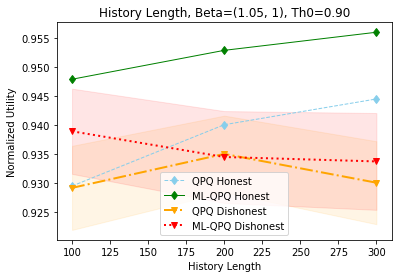

In [41]:
##########################
# Sim History Len Beta1.05 with threshold 0.90
#########################
simresults = {'UtilityHonests1': [], 'UtilityHonests2': [], 'QPQ/QPQ2_Honests': [], 
              'UtilityDishonests1': [], 'UtilityDishonests2': [], 'QPQ/QPQ2_Dishonests': [],
              'confidence_intervalHonestsLow1': [], 'confidence_intervalHonestsLow2': [],
              'confidence_intervalDishonestsLow1': [], 'confidence_intervalDishonestsLow2': [],
              'confidence_intervalHonestsHigh1': [], 'confidence_intervalHonestsHigh2': [],
              'confidence_intervalDishonestsHigh1': [], 'confidence_intervalDishonestsHigh2': [],
              'historyLen': [] 
             }
confidence_level = 0.95

for idx0, historyLen in enumerate(historyLenArray):
    for idx1, numclusters in enumerate(numclustersArray):
        for idx2, numplayers in enumerate(numplayersArray):
            for idx3, betaFactor in enumerate(betafactorArray):
                for idx4, numLiars in enumerate(numLiarsArray):
                    if (int(numplayers/numclusters) < 2 or numplayers <= numLiars):
                        continue
         
                    dfTmp1 = df[(df.QPQversion == 1) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    dfTmp2 = df[(df.QPQversion == 2) & (df.players == numplayers) & (df.clusters == numclusters) & (df.betafactor == betaFactor) & (df.numliars == numLiars) & (df.QPQHL == historyLen)]
                    
                    UtilityHonests1 = dfTmp1.UtilityHonest.mean()
                    UtilityHonests2 = dfTmp2.UtilityHonest.mean()

                    simresults['UtilityHonests1'].append(NormalizeUtility(UtilityHonests1, numplayers))
                    simresults['UtilityHonests2'].append(NormalizeUtility(UtilityHonests2, numplayers))
                    simresults['QPQ/QPQ2_Honests'].append(UtilityHonests1/UtilityHonests2)
                    
                    degrees_freedom = dfTmp1.UtilityHonest.size - 1

                    UtilitySEMMixHonests1 = stats.sem(dfTmp1.UtilityHonest)
                    UtilitySEMMixHonests2 = stats.sem(dfTmp2.UtilityHonest)
                    confidence_intervalH1 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests1, UtilitySEMMixHonests1)
                    confidence_intervalH2 = stats.t.interval(confidence_level, degrees_freedom, UtilityHonests2, UtilitySEMMixHonests2)

                    #print(UtilityHonests1, NormalizeUtility(confidence_intervalH1[0], numplayers), NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsLow1'].append(NormalizeUtility(confidence_intervalH1[0], numplayers))
                    simresults['confidence_intervalHonestsLow2'].append(NormalizeUtility(confidence_intervalH2[0], numplayers))
                    simresults['confidence_intervalHonestsHigh1'].append(NormalizeUtility(confidence_intervalH1[1], numplayers))
                    simresults['confidence_intervalHonestsHigh2'].append(NormalizeUtility(confidence_intervalH2[1], numplayers)) 

                    if (numLiars > 0):
                        UtilityMixDishonests1 = dfTmp1.UtilityDishonest.mean()
                        UtilityMixDishonests2 = dfTmp2.UtilityDishonest.mean()

                        simresults['UtilityDishonests1'].append(NormalizeUtility(UtilityMixDishonests1, numplayers))
                        simresults['UtilityDishonests2'].append(NormalizeUtility(UtilityMixDishonests2, numplayers))
                        simresults['QPQ/QPQ2_Dishonests'].append(UtilityMixDishonests1/UtilityMixDishonests2)
                        
                         # Compute SEM Standard Error of the Mean
                        UtilitySEMMixDishonests1 = stats.sem(dfTmp1.UtilityDishonest )
                        UtilitySEMMixDishonests2 = stats.sem(dfTmp2.UtilityDishonest )

                        confidence_intervalD1 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests1, UtilitySEMMixDishonests1)
                        confidence_intervalD2 = stats.t.interval(confidence_level, degrees_freedom, UtilityMixDishonests2, UtilitySEMMixDishonests2)
                        
                        #print(UtilityMixDishonests1, confidence_intervalD1[0], confidence_intervalD1[1])
                        simresults['confidence_intervalDishonestsLow1'].append(NormalizeUtility(confidence_intervalD1[0], numplayers))
                        simresults['confidence_intervalDishonestsLow2'].append(NormalizeUtility(confidence_intervalD2[0], numplayers))
                        simresults['confidence_intervalDishonestsHigh1'].append(NormalizeUtility(confidence_intervalD1[1], numplayers))
                        simresults['confidence_intervalDishonestsHigh2'].append(NormalizeUtility(confidence_intervalD2[1], numplayers)) 
                    else:
                        simresults['UtilityDishonests1'].append(0)
                        simresults['UtilityDishonests2'].append(0)
                        simresults['QPQ/QPQ2_Dishonests'].append(1)
                        simresults['confidence_intervalDishonestsLow1'].append(0) 
                        simresults['confidence_intervalDishonestsLow2'].append(0)
                        simresults['confidence_intervalDishonestsHigh1'].append(0) 
                        simresults['confidence_intervalDishonestsHigh2'].append(0)

                    simresults['historyLen'].append(historyLen)
                    
rst = pd.DataFrame(data=simresults)
# multiple line plot
plt.plot( 'historyLen', 'UtilityHonests1', data=rst, marker='d', color='skyblue', linestyle='--', linewidth=1, label="QPQ Honest")
plt.plot( 'historyLen', 'UtilityHonests2', data=rst, marker='d', color='green', linestyle='-', linewidth=1, label="ML-QPQ Honest")
#plt.fill_between('historyLen','confidence_intervalHonestsHigh1','confidence_intervalHonestsLow1', data=rst, color='skyblue', alpha=.10)
#plt.fill_between('historyLen','confidence_intervalHonestsHigh2','confidence_intervalHonestsLow2', data=rst, color='green', alpha=.10)
plt.plot( 'historyLen', 'UtilityDishonests1', data=rst, marker='v', color='orange', linestyle='-.', linewidth=2, label="QPQ Dishonest")
plt.plot( 'historyLen', 'UtilityDishonests2', data=rst, marker='v', color='red', linestyle=':', linewidth=2, label="ML-QPQ Dishonest")
plt.fill_between('historyLen','confidence_intervalDishonestsHigh1','confidence_intervalDishonestsLow1', data=rst, color='orange', alpha=.10)
plt.fill_between('historyLen','confidence_intervalDishonestsHigh2','confidence_intervalDishonestsLow2', data=rst, color='red', alpha=.10)
plt.title("History Length, Beta=(1.05, 1), Th0=0.90")
plt.xlabel("History Length")
plt.ylabel("Normalized Utility");
plt.legend()

plt.savefig(commondir + 'images/historylenbeta1.05-th0.90.pdf', format='pdf')